In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from statannotations.Annotator import Annotator

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('source/FReDA4.csv')

In [3]:
# Satisfied
df.loc[df['Group1'] == 'SubGroup1', 'Group4'] = 'Satisfied'

# Deprived groups
df.loc[df['Group1'] == 'SubGroup3', 'Group4'] = 'Deprived_Couples'
df.loc[df['Group2'] == 'One-sided Deprivation', 'Group4'] = 'Deprived_One'
# df.loc[df['Group1'] == 'SubGroup2', 'Group4'] = 'Deprived_Me'
# df.loc[df['Group1'] == 'SubGroup7', 'Group4'] = 'Deprived_Partner'

# Saturated groups
df.loc[df['Group1'] == 'SubGroup6', 'Group4'] = 'Saturated_Couples'
df.loc[df['Group2'] == 'One-sided Saturation', 'Group4'] = 'Saturated_One'
# df.loc[df['Group1'] == 'SubGroup5', 'Group4'] = 'Saturated_Me'
# df.loc[df['Group1'] == 'SubGroup8', 'Group4'] = 'Saturated_Partner'

# Mixed groups
df.loc[df['Group1'] == 'SubGroup4', 'Group4'] = 'Mixed_Couples'
df.loc[df['Group1'] == 'SubGroup9', 'Group4'] = 'Mixed_Couples'

In [4]:
lower_limit = {
    "Neuroticism": 3,  # 3 items, 1-5 options
    "Extraversion": 3,  # 3 items, 1-5 options
    "Openness": 3,  # 3 items, 1-5 options
    "Agreeableness": 3,  # 3 items, 1-5 options
    "Conscientiousness": 3,  # 3 items, 1-5 options
    "Depressiveness": 3,  # 3 items, 1-4 options
    "Loneliness": 1,  # 1 item, 1-5 options
    "Self-esteem": 3,  # 3 items, 1-5 options
    "Life Satisfaction": 0,  # 1 item, 0-10 options
    "Health": 1,  # 1 item, 1-5 options
    "Relationship Satisfaction": 0,  # 1 item, 0-10 options
    "Communication Quality": 6,  # 6 items, 1-5 options
    "Conflict Management": 6,  # 6 items, 1-5 options
}
upper_limit = {
    "Neuroticism": 15,
    "Extraversion": 15,
    "Openness": 15,
    "Agreeableness": 15,
    "Conscientiousness": 15,
    "Depressiveness": 12,
    "Loneliness": 5,
    "Self-esteem": 15,
    "Life Satisfaction": 10,
    "Health": 5,
    "Relationship Satisfaction": 10,
    "Communication Quality": 30,
    "Conflict Management": 30,
}
cols_to_fix = list(lower_limit.keys())
min_s = pd.Series(lower_limit)
max_s = pd.Series(upper_limit)

df_percent = df.copy()
df_percent[cols_to_fix] = ((df[cols_to_fix] - min_s) / (max_s - min_s)) * 100

In [5]:
order_couple = ["Satisfied", "Deprived_Couples", "Saturated_Couples", "Mixed_Couples"]
order_one = ["Deprived_One", "Saturated_One"]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Satisfied vs. Deprived_Couples: Custom statistical test, P_val:0.000e+00
Satisfied vs. Mixed_Couples: Custom statistical test, P_val:0.000e+00


(<Axes: ylabel='Trait score (%)'>,
  <statannotations.Annotation.Annotation at 0x1c0620765a0>])

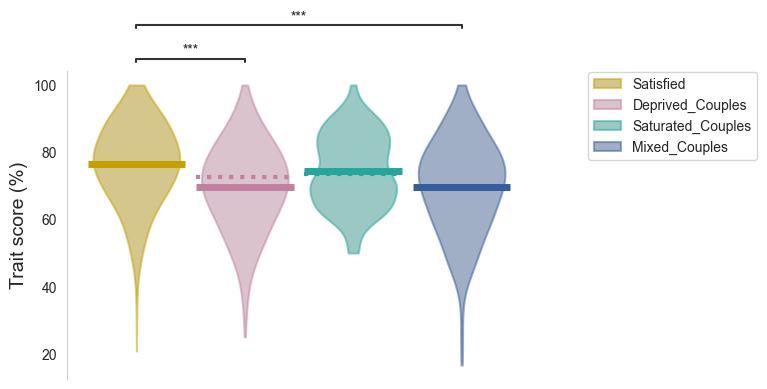

In [70]:
trait = [
    # "Neuroticism",
    # "Extraversion",
    # "Openness",
    # "Agreeableness",
    # "Conscientiousness",
    # "Depressiveness",
    # "Loneliness",
    # "Self-esteem",
    # "Life Satisfaction",
    # "Health",
    # "Relationship Satisfaction",
    # "Communication Quality",
    "Conflict Management",
]

colors = [
    '#C4A000',
    '#c1809e',
    '#26a59a',
    '#355C9C',
]

fig, ax = plt.subplots(figsize=(6, 4))

df_long = df_percent.melt(
    id_vars=['Group4'],
    value_vars=trait,
    var_name='Category',
    value_name='Measurement'
)

means = df_long.groupby('Group4', observed=True)['Measurement'].mean()

sns.violinplot(
    ax=ax,
    data=df_long,
    x="Group4",
    y="Measurement",
    # hue="Group4",
    order=order_couple,
    inner=None,
    cut=0,
    linewidth=1.5,
    palette=colors,
    alpha=0.5,
    bw_method=0.35,
    # legend=False,
)

min_max = 0.45
for i, cat in enumerate(order_couple):
    ax.hlines(
        y=means[cat],
        xmin=i - min_max,
        xmax=i + min_max,
        colors=colors[i],
        linestyle='-',
        zorder=3,
        lw=5,
    )
from matplotlib.lines import Line2D
legend_lines = []
for i, cat in enumerate(order_one):
    ax.hlines(
        y=means[cat],
        xmin=(i + 1) - min_max,
        xmax=(i + 1) + min_max,
        colors=colors[i + 1],
        linestyle=':',
        zorder=3,
        lw=3,
    )
    legend_lines.append(
        Line2D([0], [0],
               color=colors[i + 1],
               linestyle=':',
               lw=3,
               label=f"Mean {cat}")
    )

ax.legend(handles=legend_lines)

for i, violin in enumerate(ax.collections[:4]):
    violin.set_edgecolor(colors[i])

x_legend = plt.legend(
    labels=order_couple,
    loc='upper right',
    bbox_to_anchor=(1.50, 1.02),
)

sns.despine(top=True, right=True, left=False, bottom=True)
plt.xlabel("")
plt.ylabel("Trait score (%)", fontsize=14)
plt.xticks([])
plt.grid(False)
# title = plt.title(trait, fontweight='bold', fontsize=14)

pairs = [
    ("Satisfied", "Deprived_Couples"),
    # ("Satisfied", "Saturated_Couples"),
    ("Satisfied", "Mixed_Couples"),
]

p_values = [
    0.000,
    # 0.998,
    0.000
]

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax)

annotator = Annotator(
    ax,
    pairs,
    data=df_long,
    x="Group4",
    y="Measurement",
    order=order_couple,
)

annotator.configure(
    test=None,  # VERY IMPORTANT
    text_format="star",
    loc="outside",
    line_height=0.01,
    line_offset=0.01,
    text_offset=1,
    pvalue_thresholds=[
        (0.001, "***"),
        (0.01, "**"),
        (0.05, "*"),
        (1, "ns")
    ]
)

annotator.set_pvalues(p_values)
annotator.annotate()

# ax.set_ylim(ymin, ymax)

# plt.savefig(f'output/img/anova/{trait}.png',
#             dpi=600,
#             transparent=False,
#             bbox_inches='tight')
